In [1]:
# 필요 모듈

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import platform
import matplotlib.font_manager as fm
from matplotlib import font_manager, rc
import plotly.express as px

path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
else:
    print("Unknown system. sorry~")

In [3]:
# 데이터 불러오기

df = pd.read_csv('./data/Customer-Churn-Records.csv')
# df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [3]:
# 상관관계를 알아보기 위해 Card Type 변경 DIAMOND:4, PLATINUM:3, GOLD:2, SILVER:1

df.loc[df['Card Type'] == 'DIAMOND', 'Card Type'] = 4
df.loc[df['Card Type'] == 'PLATINUM', 'Card Type'] = 3
df.loc[df['Card Type'] == 'GOLD', 'Card Type'] = 2
df.loc[df['Card Type'] == 'SILVER', 'Card Type'] = 1
df['Card Type'] = df['Card Type'].astype(int)

C:\Users\gks76\AppData\Local\Temp\ipykernel_17200\3196579609.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr()
c:\Users\gks76\miniconda3\envs\ds_study\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\Users\gks76\miniconda3\envs\ds_study\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\Users\gks76\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


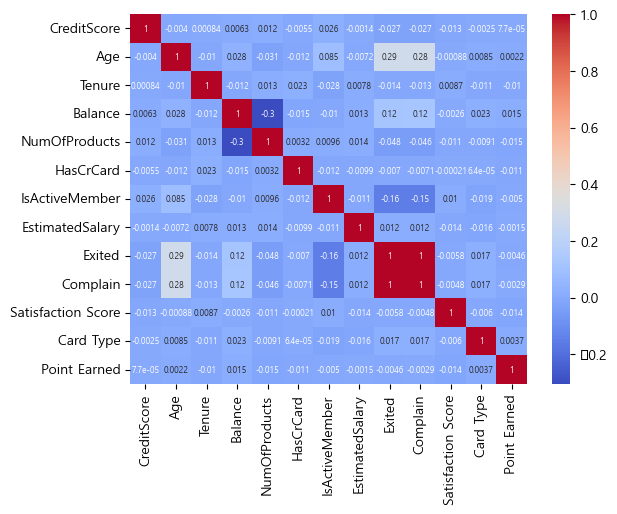

In [4]:
# 상관관계 히트맵
corr_df = df.corr()
sns.heatmap(corr_df, annot=True, cmap='coolwarm', annot_kws={'size':6});

In [5]:
# 각 값에 대한 상관관계 (complain이 가장 높게 나옴)
df.corr()['Exited'].abs().sort_values(ascending=False)

C:\Users\gks76\AppData\Local\Temp\ipykernel_17200\1960709318.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Exited'].abs().sort_values(ascending=False)


Exited                1.000000
Complain              0.995693
Age                   0.285296
IsActiveMember        0.156356
Balance               0.118577
NumOfProducts         0.047611
CreditScore           0.026771
Card Type             0.016949
Tenure                0.013656
EstimatedSalary       0.012490
HasCrCard             0.006976
Satisfaction Score    0.005849
Point Earned          0.004628
Name: Exited, dtype: float64

In [6]:
df['Exited'].value_counts()

0    7962
1    2038
Name: Exited, dtype: int64

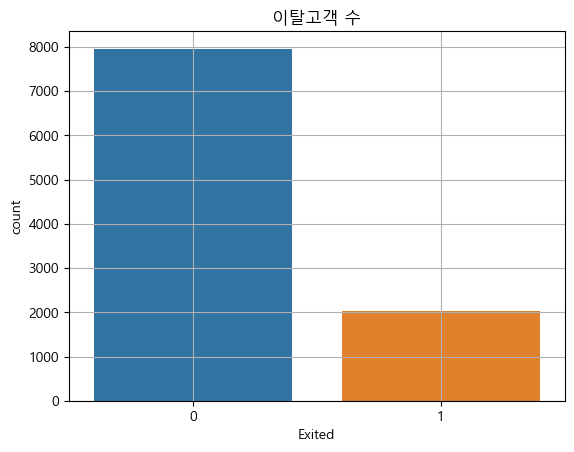

In [7]:
# 이탈고객 수
sns.countplot(data=df, x='Exited')
plt.title('이탈고객 수')
plt.grid()
plt.show();

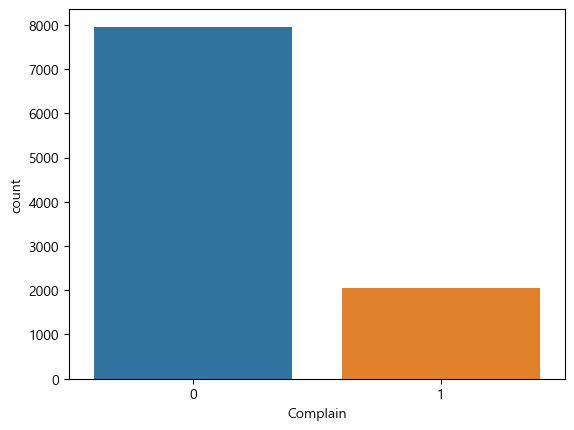

In [8]:
# Complain 
sns.countplot(data=df, x='Complain')
plt.show();

In [9]:
df['Complain'].value_counts()

0    7956
1    2044
Name: Complain, dtype: int64

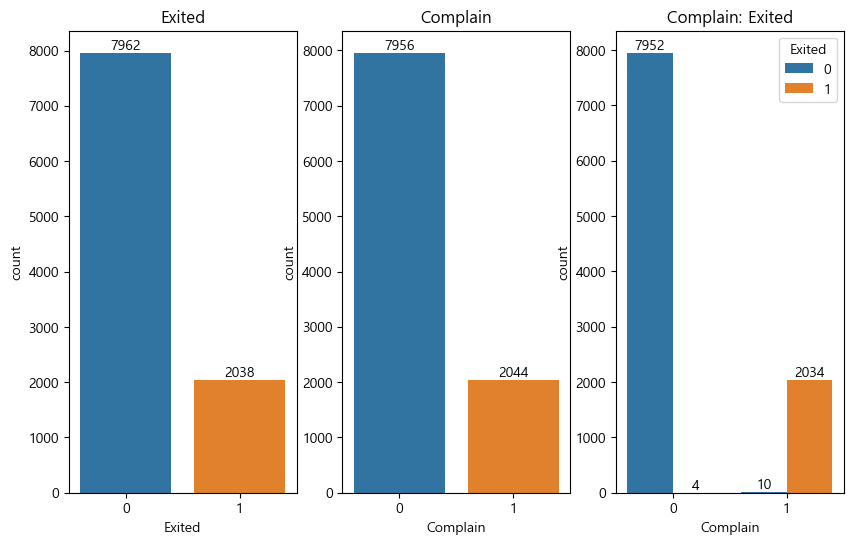

In [10]:
# 이탈 / Complain 
f, ax = plt.subplots(1, 3, figsize=(10, 6))
ax[0].set_title('Exited')
sns.countplot(x='Exited', data=df, ax=ax[0])
ax[1].set_title('Complain')
sns.countplot(x='Complain', data=df, ax=ax[1])
ax[2].set_title('Complain: Exited');
sns.countplot(x='Complain', hue='Exited', data=df, ax=ax[2])

# 그래프에 수치 나타내는 코드
for i in range(3):
    for p in ax[i].patches:
        height = int(p.get_height())
        ax[i].annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

- complain이 없던사람(0)에서는 4명이 이탈
- complain이 있던사람(1)에서는 2034명이 이탈
---

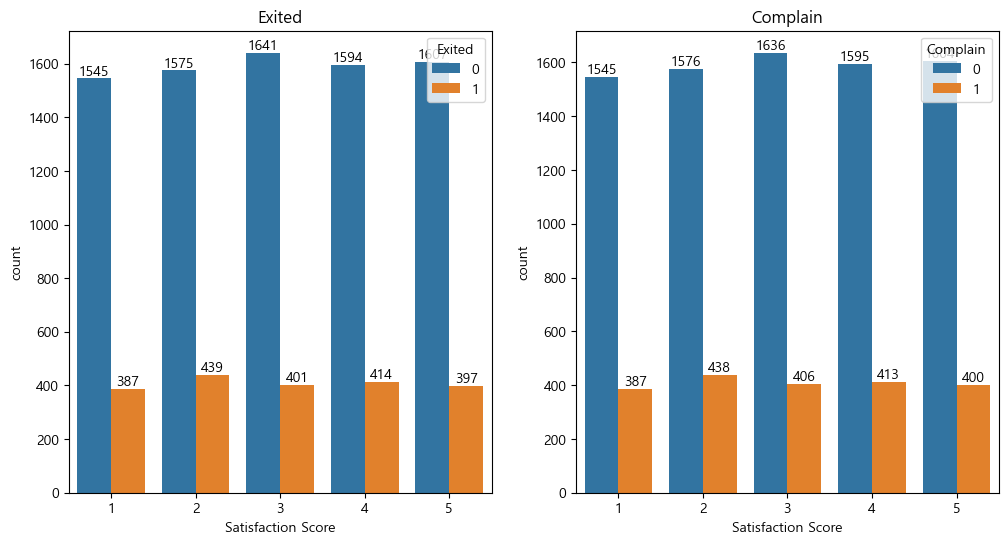

In [11]:
# 만족도에 따른 Exited / Complain
f, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].set_title('Exited')
sns.countplot(x='Satisfaction Score', hue='Exited', data=df, ax=ax[0])

ax[1].set_title('Complain')
ax[1] = sns.countplot(x='Satisfaction Score', hue='Complain', data=df, ax=ax[1])
for i in range(2):
        for p in ax[i].patches:
                height = int(p.get_height())
                ax[i].annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

- 만족도가 좋다고 해서 Complain/이탈자가 적은 것은 아니다.

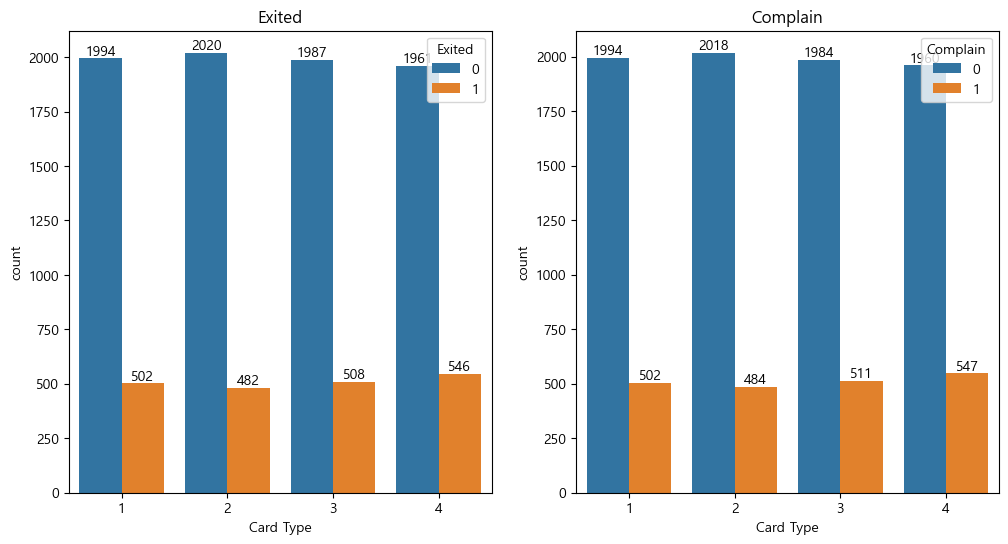

In [12]:
# 카드유형에 따른 Exited / Complain
f, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].set_title('Exited')
sns.countplot(x='Card Type', hue='Exited', data=df, ax=ax[0])

ax[1].set_title('Complain')
ax[1] = sns.countplot(x='Card Type', hue='Complain', data=df, ax=ax[1])
for i in range(2):
        for p in ax[i].patches:
                height = int(p.get_height())
                ax[i].annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

- 카드 유형에 따라 만족도와 이탈자 부분에서 별다른 차이는 확인하기 힘들다.

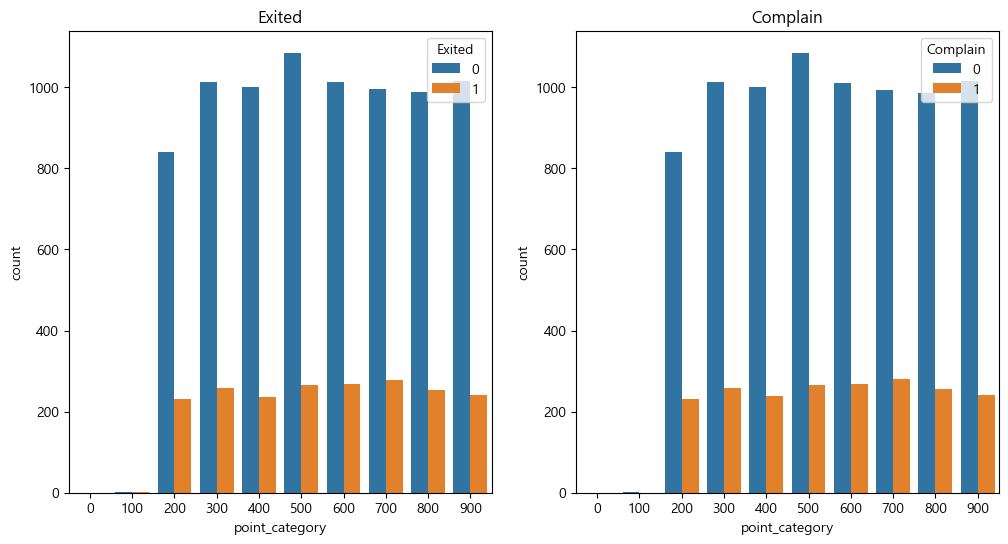

In [13]:
# 포인트에 따른 Exited / Complain
df['point_category'] = pd.cut(df['Point Earned'], bins=range(0, 1100, 100), right=False, labels=range(0, 1000, 100))

f, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].set_title('Exited')
sns.countplot(x='point_category', hue='Exited', data=df, ax=ax[0]);

ax[1].set_title('Complain')
sns.countplot(x='point_category', hue='Complain', data=df, ax=ax[1]);

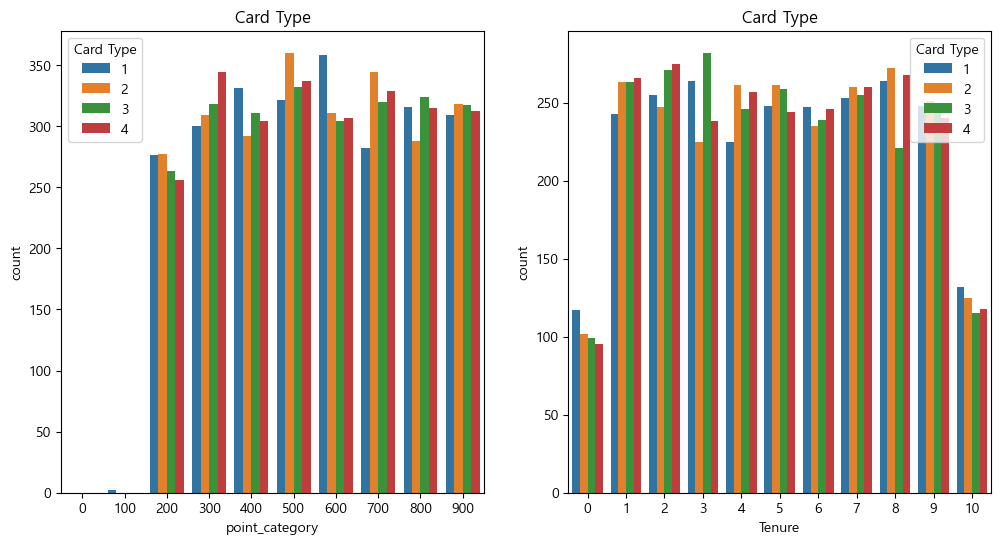

In [23]:
# 포인트, 기간 따른 Exited / Complain
df['point_category'] = pd.cut(df['Point Earned'], bins=range(0, 1100, 100), right=False, labels=range(0, 1000, 100))

f, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].set_title('Card Type')
sns.countplot(x='point_category', hue='Card Type', data=df, ax=ax[0]);

ax[1].set_title('Card Type')
sns.countplot(x='Tenure', hue='Card Type', data=df, ax=ax[1]);

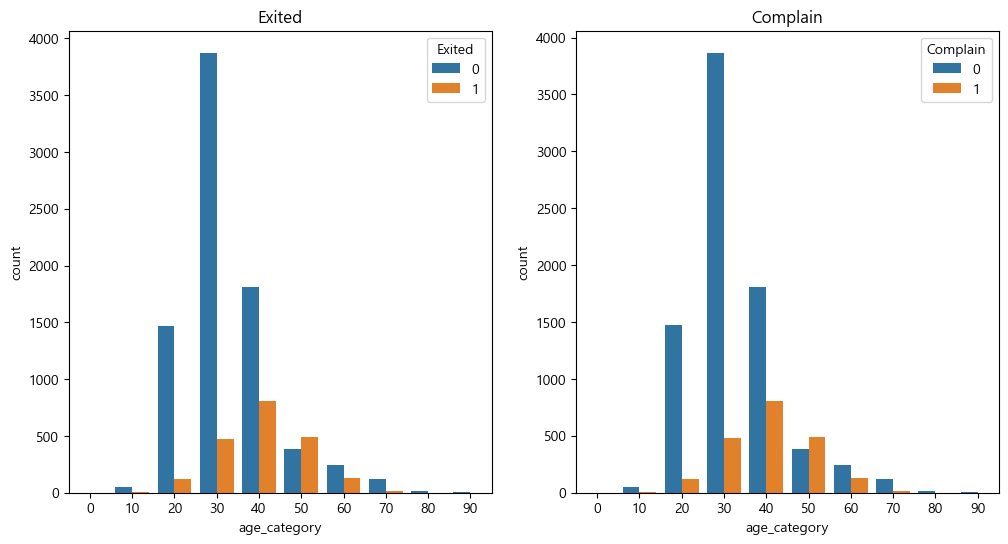

In [15]:
# 연령에 따른 Exited / Complain
df['age_category'] = pd.cut(df['Age'], bins=range(0, 110, 10), right=False, labels=range(0, 100, 10))

f, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].set_title('Exited')
sns.countplot(x='age_category', hue='Exited', data=df, ax=ax[0]);

ax[1].set_title('Complain')
sns.countplot(x='age_category', hue='Complain', data=df, ax=ax[1]);

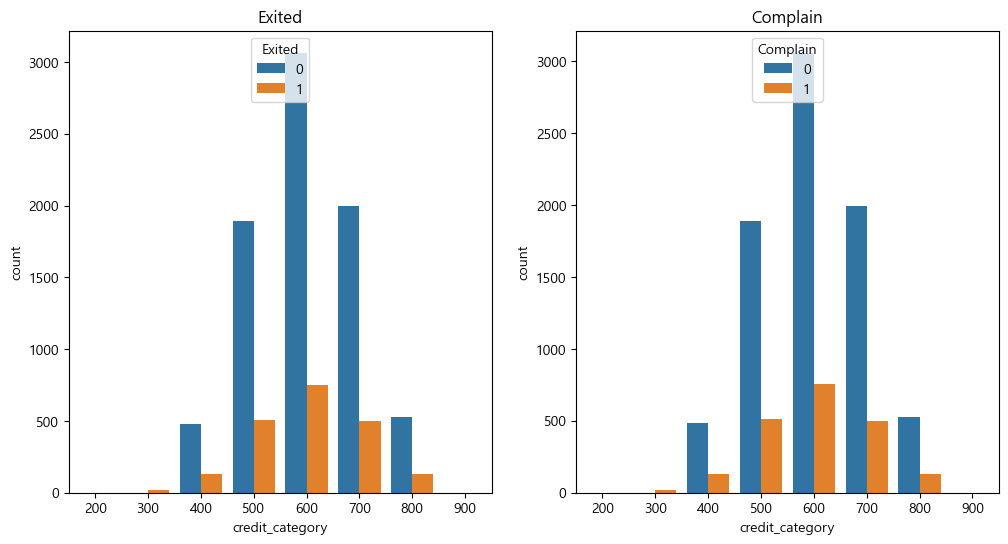

In [16]:
# CreditScore 따른 Exited / Complain
df['credit_category'] = pd.cut(df['CreditScore'], bins=range(200, 1100, 100), right=False, labels=range(200, 1000, 100))

f, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].set_title('Exited')
sns.countplot(x='credit_category', hue='Exited', data=df, ax=ax[0]);

ax[1].set_title('Complain')
sns.countplot(x='credit_category', hue='Complain', data=df, ax=ax[1]);

In [17]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type', 'Point Earned',
       'point_category', 'age_category', 'credit_category'],
      dtype='object')

In [18]:
df['CreditScore'].sort_values()

8762    350
8723    350
1838    350
9624    350
1631    350
       ... 
937     850
2980    850
960     850
3109    850
5134    850
Name: CreditScore, Length: 10000, dtype: int64

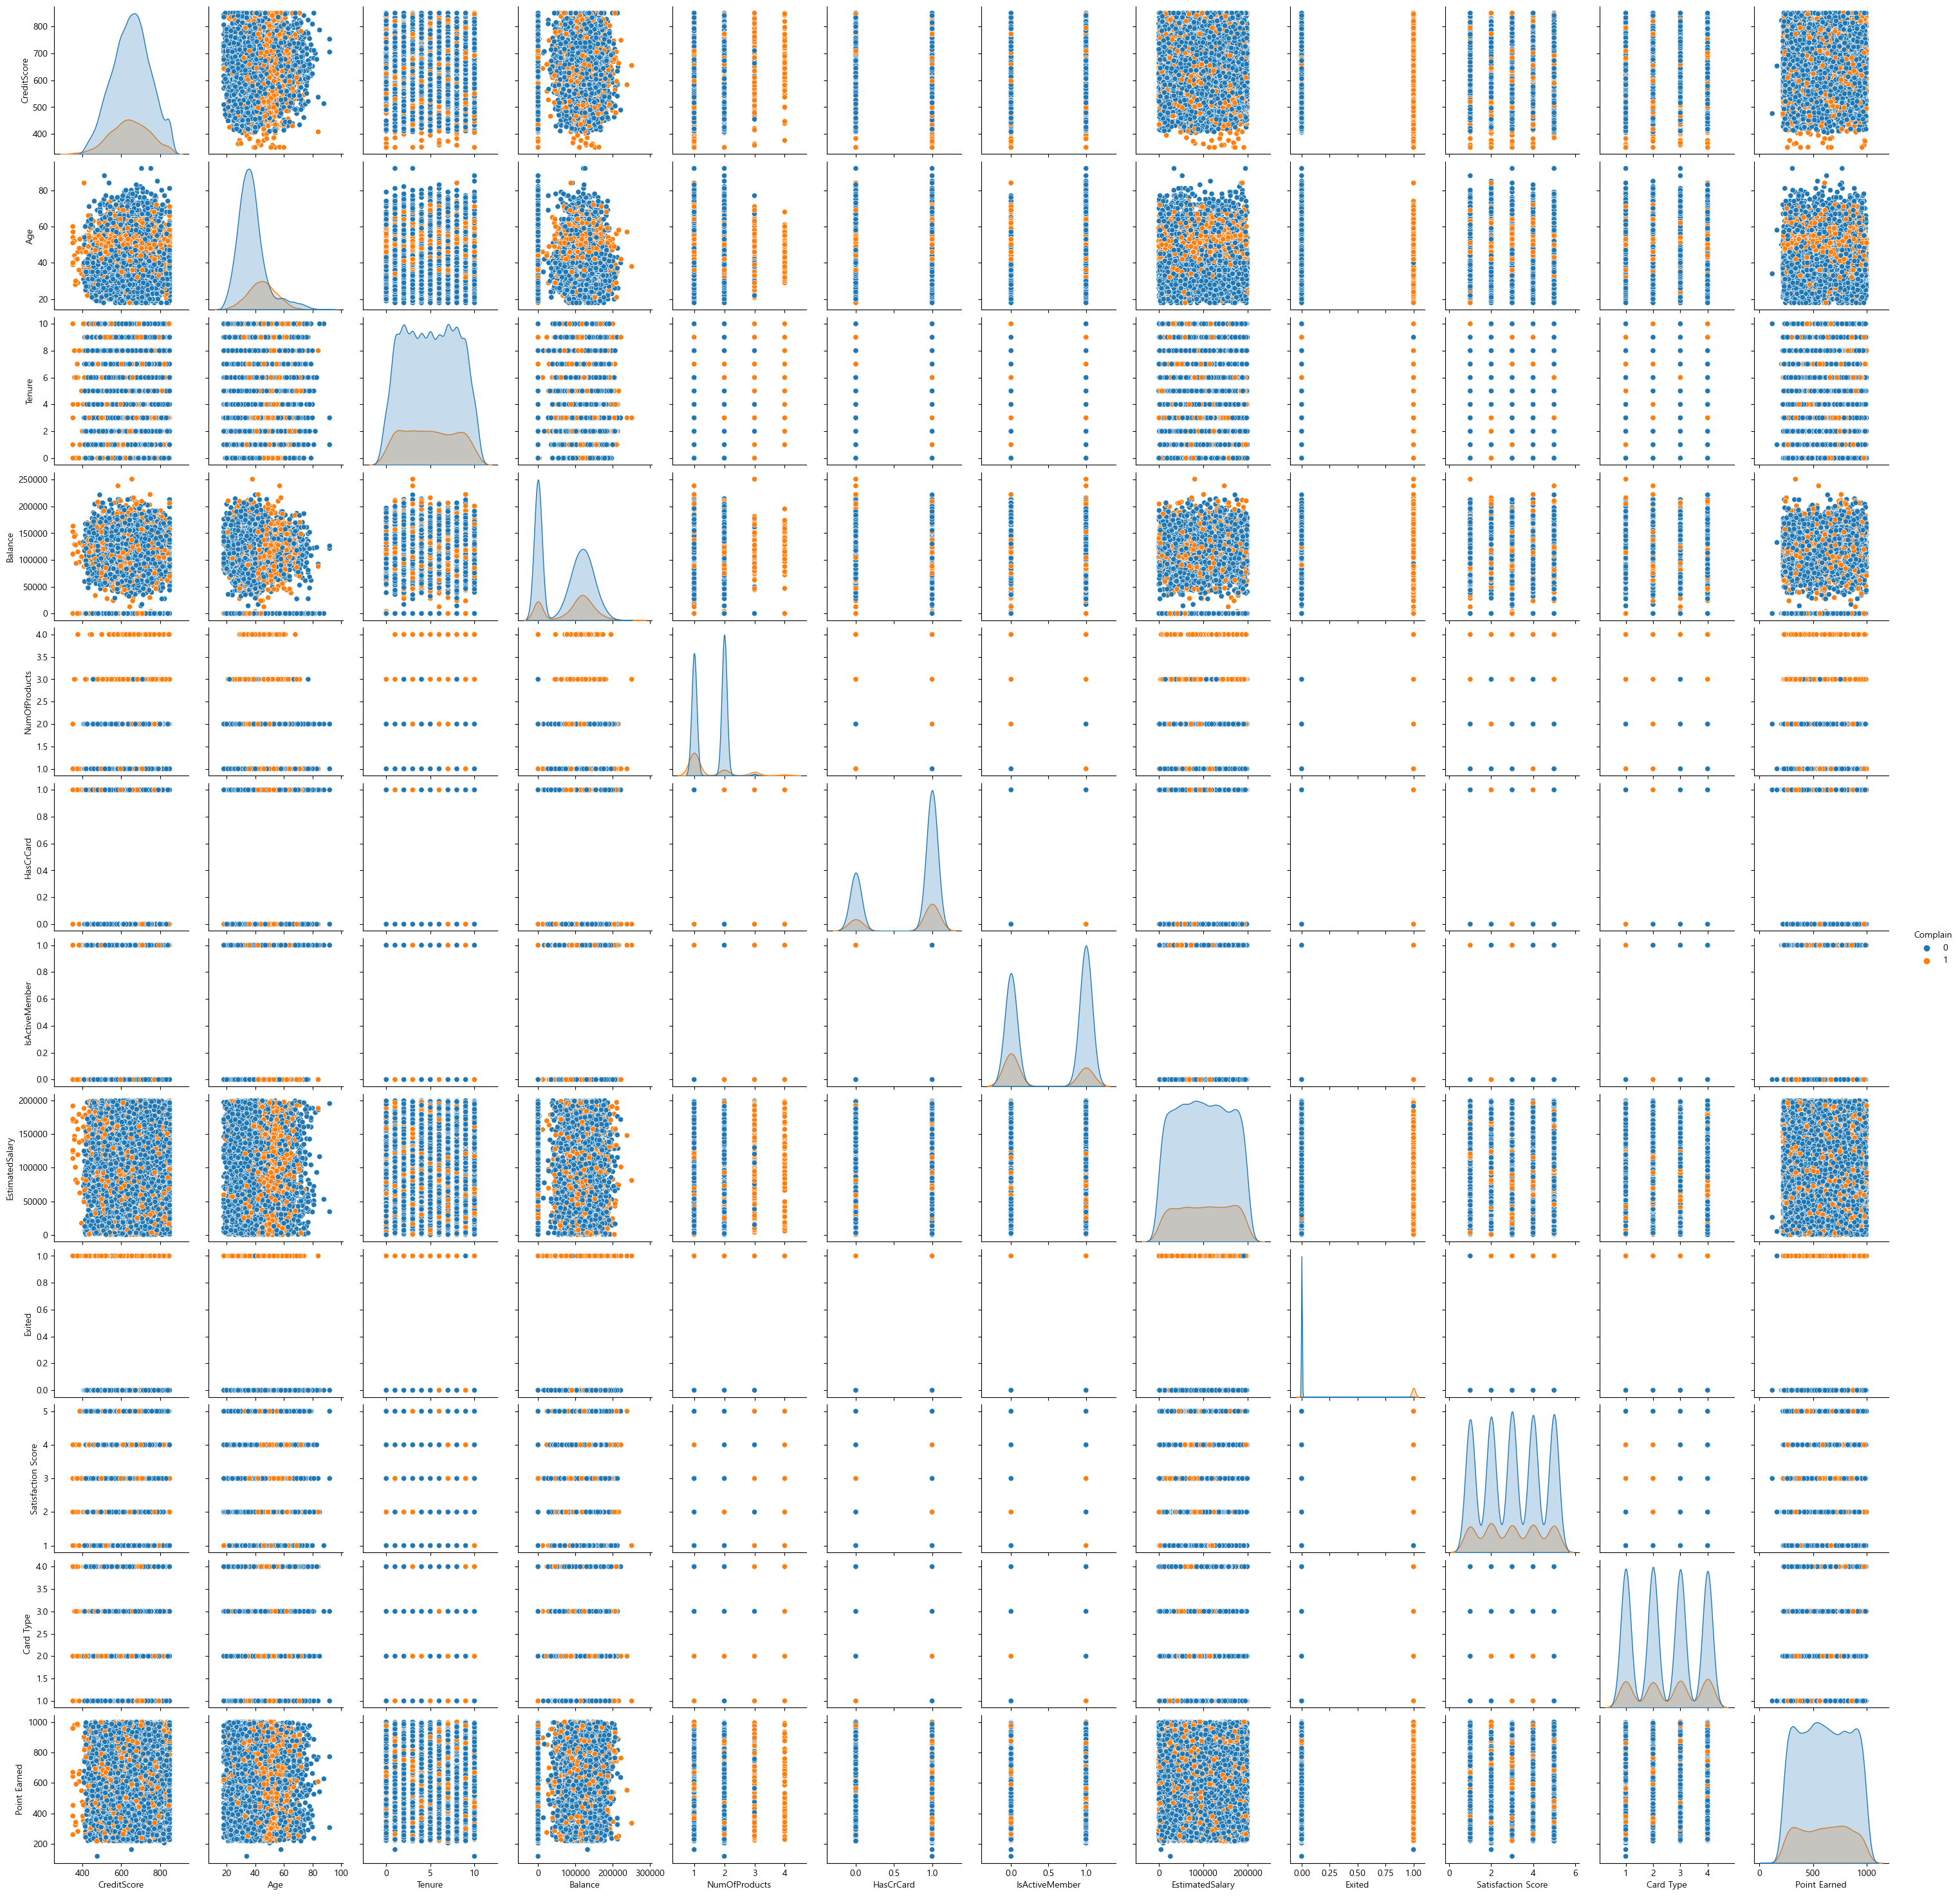

In [19]:
sns.pairplot(df, hue = 'Complain')
plt.show()

In [20]:
df['Card Type'].value_counts()

4    2507
2    2502
1    2496
3    2495
Name: Card Type, dtype: int64

In [21]:
df[df['Age']>75].sort_values('Age')

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
5957          612   Germany    Male   76       6   96166.88              1   
1205          780    France    Male   76      10  121313.88              1   
7063          580   Germany    Male   76       2  130334.84              2   
9587          719   Germany  Female   76      10   95052.29              1   
2925          717    France  Female   76       9  138489.66              1   
3142          697    France  Female   76       7       0.00              2   
7788          551     Spain    Male   76       2  128410.71              2   
7552          636     Spain    Male   76       9  126534.60              1   
4256          596     Spain  Female   76       9  134208.25              1   
3691          590    France  Female   76       5  160979.68              1   
3826          774    France    Male   76       4  112510.89              1   
6721          824   Germany    Male   77       3   27517.15              2   
9894          521    France  Female   77       6       0.00              2   
4815          775   Germany  Female   77       6  135120.56              1   
4318          673   Germany  Female   77      10   76510.52              2   
7243          634    France    Male   77       5       0.00              2   
9936          609    France    Male   77       1       0.00              1   
2164          767     Spain    Male   77       8  149083.70              1   
1614          641    France    Male   77       9       0.00              3   
7375          639    France    Male   77       6   80926.02              2   
3602          667     Spain    Male   77       2       0.00              1   
5490          655     Spain  Female   78       2       0.00              2   
9333          755    France  Female   78       5  121206.96              1   
4590          635    France  Female   78       6   47536.40              1   
9671          649   Germany    Male   78       4   68345.86              2   
9736          659     Spain    Male   78       2  151675.65              1   
252           681    France  Female   79       0       0.00              2   
5068          712     Spain  Female   79       5  108078.56              1   
4832          617    France  Female   79       7       0.00              1   
3651          732    France    Male   79      10   61811.23              1   
310           652    France  Female   80       4       0.00              2   
3994          809     Spain    Male   80       8       0.00              2   
9490          624    France    Male   80       3       0.00              1   
9080          711    France  Female   81       6       0.00              2   
7956          850    France    Male   81       5       0.00              2   
7526          850    France  Female   81       1       0.00              2   
4931          682   Germany    Male   81       6  122029.15              1   
766           700    France  Female   82       2       0.00              2   
9309          678   Germany    Male   83       6  123356.63              1   
3531          408    France  Female   84       8   87873.39              1   
3387          537   Germany    Male   84       8   92242.34              1   
3033          787    France  Female   85      10       0.00              2   
2458          513     Spain    Male   88      10       0.00              2   
6443          753    France    Male   92       3  121513.31              1   
6759          705    France    Male   92       1  126076.24              2   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  Complain  \
5957          1               1        191393.26       0         0   
1205          0               1         64872.33       0         0   
7063          1               1         51672.08       0         0   
9587          1               0        176244.87       0         0   
2925          1               1         68400.14       0         0 

In [22]:
!pip install koreanize-matplotlib